## Change Longitude Values to 360 gedree to be able to read for PyLag

#### Read the watershed pour points extracted from Arc, rename columns, and save them in a order

### Required imports

In [13]:
import math
import numpy as np
import pandas as pd

In [14]:
# read the csv file into a pandas dataframe and read the columns of lat lon and group_id

df = pd.read_csv('/home/samin/data/FVCOME_OUTPUT/simulations/Huron/input/initial_position/WatershedPourPoints_LH_copy_new.csv')
df
#

,FID,pointid,gridcode,Group_id,POINT_X,POINT_Y
0,0,270,559,0,-84.665841,45.745061
1,1,272,435,1,-84.828741,45.749943
2,2,276,557,2,-84.486036,45.663177
3,3,277,560,3,-84.234358,45.637350
4,4,278,585,4,-84.464815,45.655921
...,...,...,...,...,...,...
127,127,0,720,128,-83.425968,45.061532
128,128,0,721,129,-84.078374,45.487312
129,129,0,741,130,-83.396562,43.818410
130,130,0,748,135,-82.406943,43.030980


# Rename col 0 to lon and col 1 to lat

In [41]:
df.rename(columns={0:"group_id", 2:"lon",1:"lat",3:"depth"}, inplace=True)

In [15]:
# create a new dataframe with the columns of lat lon and group_id, depth adn these coulms are equal to the value of the columns in the original dataframe
df_new = pd.DataFrame(columns=['lat', 'lon', 'group_id', 'depth'])
df_new['lat'] = df['POINT_Y']
df_new['lon'] = df['POINT_X']
df_new['group_id'] = df['Group_id']
df_new['depth'] = 0.0


In [21]:
print(df_new.max())

lat          45.749943
lon         277.593057
group_id    147.000000
depth         0.000000
dtype: float64


# Relocate the first column with 360 coordinates

In [17]:
#relocate the first column with 360 coordinates
df_new["lon"] = df_new["lon"] + 360
df_new

,lat,lon,group_id,depth
0,45.745061,275.334159,0,0.0
1,45.749943,275.171259,1,0.0
2,45.663177,275.513964,2,0.0
3,45.637350,275.765642,3,0.0
4,45.655921,275.535185,4,0.0
...,...,...,...,...
127,45.061532,276.574032,128,0.0
128,45.487312,275.921626,129,0.0
129,43.818410,276.603438,130,0.0
130,43.030980,277.593057,135,0.0


# add two new coloumns

In [57]:
df["depth"] = 0.0
#df["group_id"] = 1

# specify the output directory to save the data

In [18]:
#out_path = '/home/samin/data/FVCOME_OUTPUT/simulations/horon/input/converted_senseflux_intersectpoint_500m_offshore.dat'
out_path = '/home/samin/data/FVCOME_OUTPUT/simulations/Huron/input/initial_position/watershed_initial_positions_huron.dat'

# Specify the order of columns and save them 

In [19]:
out_col_order = ["group_id", "lon","lat", "depth"]
df_new.loc[:, out_col_order].to_csv(out_path, sep = ' ', index = False, header=False)

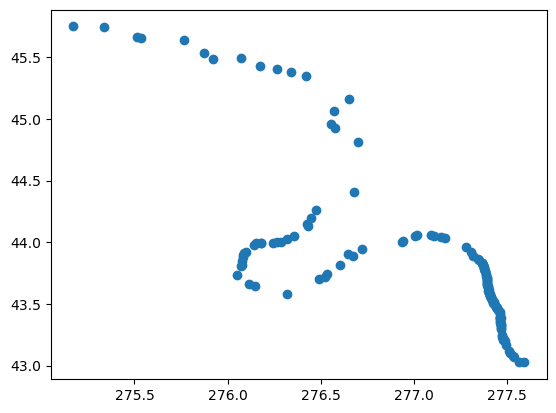

In [20]:
# plot lon and lat
import matplotlib.pyplot as plt
plt.scatter(df_new['lon'], df_new['lat'])
plt.show()